# Data Wrangling | News ( HK NLP Project )

# Table of Contents
* [1 News Wrangling](#2_Data_wrangling)
  * [1.1 Contents](#Contents)
  * [1.2 Imports & Set Up](#imports)
  * [1.3 Initial Review before Regex](#irbr)
  * [1.4 Regex](#regex)
  * [1.5 xxxxxxxxxxxxxx](#_____)
  * [1.6 xxxxxxxxxxxxxx](#_____)
  * [1.7 xxxxxxxxxxxxxx](#_____)
  * [1.8 xxxxxxxxxxxxxx](#_____)
  * [1.9 xxxxxxxxxxxxxx](#_____)
  * [1.10 Saving to the Main Dataframe](#saving)



# **1.1 Contents**<a id='Contents'></a>

This is where you will summarize your intent.

# **1.2 Imports & Set Up**<a id='imports'></a>

**Importing the necessary tools** required & confirming our version.

In [352]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import os
import lxml
import datetime
import requests
import json
import collections
import seaborn as sns
from scipy import stats
import numpy as np
from numpy import median
from bs4 import BeautifulSoup as soup
import csv
import re
import pickle

from datetime import date
from datetime import datetime
today = date.today()
d = today.strftime("%m-%d-%y")

%reload_ext watermark

In [353]:
%watermark -d -t -v -p pandas

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

pandas: 1.1.3



**Importing the news** which were scraped & saved elsewhere.

In [354]:
# The international news articles
bbc_1 = pd.read_csv('./_Capstone_Two_NLP/data/_news/bbc_1.csv')
bbc_2 = pd.read_csv('./_Capstone_Two_NLP/data/_news/bbc_2.csv')
# 3
# 4
nytimes_5 = pd.read_csv('./_Capstone_Two_NLP/data/_news/nytimes_5.csv')
forbes_6 = pd.read_csv('./_Capstone_Two_NLP/data/_news/forbes_6.csv')
insider_5 = pd.read_csv('./_Capstone_Two_NLP/data/_news/insider_5.csv')
abc_6 = pd.read_csv('./_Capstone_Two_NLP/data/_news/abc_6.csv')
# 9
# 10
cnn_11 = pd.read_csv('./_Capstone_Two_NLP/data/_news/cnn_11.csv')
nypost_8 = pd.read_csv('./_Capstone_Two_NLP/data/_news/nypost_8.csv')
nippon_9 = pd.read_csv('./_Capstone_Two_NLP/data/_news/nippon_9.csv')
# 14
# 15
# 16
# 17
bbc_18 = pd.read_csv('./_Capstone_Two_NLP/data/_news/bbc_18.csv')
bbc_19 = pd.read_csv('./_Capstone_Two_NLP/data/_news/bbc_19.csv')
bbc_20 = pd.read_csv('./_Capstone_Two_NLP/data/_news/bbc_20.csv')
bbc_21 = pd.read_csv('./_Capstone_Two_NLP/data/_news/bbc_21.csv')
bbc_22 = pd.read_csv('./_Capstone_Two_NLP/data/_news/bbc_22.csv')
theDiplomat_23 = pd.read_csv('./_Capstone_Two_NLP/data/_news/theDiplomat_23.csv')




# China news articles
peoples_daily_1 = pd.read_csv('./_Capstone_Two_NLP/data/_news/peoples_daily_1.csv')
peoples_daily_2 = pd.read_csv('./_Capstone_Two_NLP/data/_news/peoples_daily_2.csv')
peoples_daily_3 = pd.read_csv('./_Capstone_Two_NLP/data/_news/peoples_daily_3.csv')
peoples_daily_4 = pd.read_csv('./_Capstone_Two_NLP/data/_news/peoples_daily_4.csv')
peoples_daily_5 = pd.read_csv('./_Capstone_Two_NLP/data/_news/peoples_daily_5.csv')
globaltimes_6 = pd.read_csv('./_Capstone_Two_NLP/data/_news/globaltimes_6.csv')
globaltimes_7 = pd.read_csv('./_Capstone_Two_NLP/data/_news/globaltimes_7.csv')
globaltimes_8 = pd.read_csv('./_Capstone_Two_NLP/data/_news/globaltimes_8.csv')
min_foreign_aff_9 = pd.read_csv('./_Capstone_Two_NLP/data/_news/min_foreign_aff_9.csv')
min_foreign_aff_10 = pd.read_csv('./_Capstone_Two_NLP/data/_news/min_foreign_aff_10.csv')
xinhua_11 = pd.read_csv('./_Capstone_Two_NLP/data/_news/xinhua_11.csv')
xinhua_12 = pd.read_csv('./_Capstone_Two_NLP/data/_news/xinhua_12.csv')
theStandard_13 = pd.read_csv('./_Capstone_Two_NLP/data/_news/theStandard_13.csv')
china_daily_14 = pd.read_csv('./_Capstone_Two_NLP/data/_news/china_daily_14.csv')
hkgovt_15 = pd.read_csv('./_Capstone_Two_NLP/data/_news/hkgovt_15.csv')


**Pulling them all together into a data frame.**

In [355]:
# setting up the main data frame for news
news = pd.DataFrame()

In [356]:
# Int'l news articles
news = news.append(bbc_1, ignore_index=True)
news = news.append(bbc_2, ignore_index=True)
# 3
# 4
news = news.append(nytimes_5, ignore_index=True)
news = news.append(forbes_6, ignore_index=True)
news = news.append(insider_5, ignore_index=True)
news = news.append(abc_6, ignore_index=True)
# 9
# 10
news = news.append(cnn_11, ignore_index=True)
news = news.append(nypost_8, ignore_index=True)
news = news.append(nippon_9, ignore_index=True)
# 14
# 15
# 16
# 17
news = news.append(bbc_18, ignore_index=True)
news = news.append(bbc_19, ignore_index=True)
news = news.append(bbc_20, ignore_index=True)
news = news.append(bbc_21, ignore_index=True)
news = news.append(bbc_22, ignore_index=True)
news = news.append(theDiplomat_23, ignore_index=True)


# China news articles
news = news.append(peoples_daily_1, ignore_index=True)
news = news.append(peoples_daily_2, ignore_index=True)
news = news.append(peoples_daily_3, ignore_index=True)
news = news.append(peoples_daily_4, ignore_index=True)
news = news.append(peoples_daily_5, ignore_index=True)
news = news.append(globaltimes_6, ignore_index=True)
news = news.append(globaltimes_7, ignore_index=True)
news = news.append(globaltimes_8, ignore_index=True)
news = news.append(min_foreign_aff_9, ignore_index=True)
news = news.append(min_foreign_aff_10, ignore_index=True)
news = news.append(xinhua_11, ignore_index=True)
news = news.append(xinhua_12, ignore_index=True)
news = news.append(theStandard_13, ignore_index=True)
news = news.append(china_daily_14, ignore_index=True)
news = news.append(hkgovt_15, ignore_index=True)


Adding a **new column for word count** on each article **for reference.**

In [361]:
word_counts = news.article.str.len().value_counts()
word_counts_list = [word_counts]
df_word_counts = pd.DataFrame(word_counts_list).T
df_word_counts['Word_count'] = df_word_counts.index
df_word_counts = df_word_counts.drop(['article'], axis=1)
df_word_counts = df_word_counts.reset_index()
df_word_counts = df_word_counts.drop(['index'], axis=1)
news['word_count'] = df_word_counts
len(df_word_counts)

30

In [362]:
news

,file_name,date,source,country,title,article,word_count
0,bbc_1,2020-06-30,BBC,UK,Hong Kong security law: What is it and is it w...,China has passed a wide-ranging new security l...,6143
1,bbc_2,2020-07-01,BBC,UK,Hong Kong's new security law: Why it scares pe...,China has introduced a new national security l...,5324
2,nytimes_5,2020-06-28,NY Times,US,What China’s New National Security Law Means f...,Chinese lawmakers have approved a national sec...,6021
3,forbes_6,2020-07-01,Forbes,US,Hong Kong Makes First Arrests Under Beijing’s ...,Share to FacebookShare to TwitterShare to Link...,3078
4,insider_5,2020-08-02,Insider,US,"Teenage arrests, blank protest signs, and a ke...","Thursday, July 30, marked one month since Chin...",18122
5,abc_6,2020-07-01,ABC News,US,What's in Hong Kong's new national security la...,The full details of the controversial national...,9868
6,cnn_11,2020-07-03,CNN,US,Hong Kong's security law could have a chilling...,London (CNN Business)Hong Kong insists its vib...,2960
7,nypost_8,2020-07-01,NY Post,US,Hong Kong police arrest over 300 in first prot...,Hong Kong police arrested more than 300 people...,16593
8,nippon_9,2020-08-14,Nippon,Japan,Hong Kong’s Security Law: How Should Japan Res...,Growing Private and Governmental Support for H...,6744
9,bbc_18,2020-06-30,BBC,UK,Hong Kong security law: Anger as China's Xi si...,"The UK, EU and Nato have expressed concern and...",9498


In [360]:
# news['article'][19]

'Zhang Xiaoming, deputy director of the Hong Kong and Macao Affairs Office of the State Council, speaks during a press conference held by the State Council Information Office about the Law of the People\'s Republic of China on Safeguarding National Security in the Hong Kong Special Administrative Region (HKSAR) in Beijing, capital of China, July 1, 2020. (Xinhua/Jin Liangkuai)\n\n\tBEIJING, July 1 (Xinhua) -- The law on safeguarding national security in the Hong Kong Special Administrative Region (HKSAR) marks a turning point and will bring the region back on track of its development, an official said Wednesday.\n\n\tThe law is designed to bring tranquility to Hong Kong, Zhang Xiaoming, deputy director of the Hong Kong and Macao Affairs Office of the State Council, made the remarks at a press conference in Beijing.\n\n\tThe law targets only a tiny group of criminals who endanger national security and will be a "sharp sword" hanging over their heads, Zhang said, adding that it will also

**I believe `word_count` numbers are incorrect.** Something to look at further at a later stage.

# 1.3 Initial Review before Regex<a id='irbr'></a>

Here we will start a **quick look** at what we have at this point. No real goal to be achieved other than **getting our feet wet.**

In [339]:
pre_scrape_total = news.word_count.sum()
pre_scrape_av = news.word_count.mean()

print('Words before cleaning','\n',
    "{:,}".format(pre_scrape_total),'| Total Words', '\n',
     "{:,}".format(round(pre_scrape_av)), '  | Average # of Words')

Words before cleaning 
 183,827 | Total Words 
 6,339   | Average # of Words


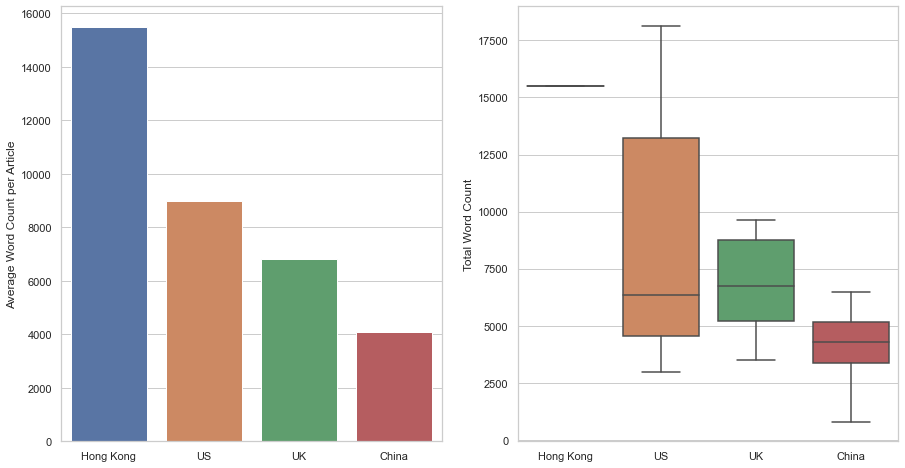

In [340]:
country_comp = pd.DataFrame(news.groupby('country')['word_count'].mean())
country_comp = country_comp.reset_index()

fig = plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")

# Setting up the Bar Chart
plt.subplot(121)
ax = sns.barplot(x="country", y="word_count", data=country_comp, 
                 order=country_comp.sort_values('word_count',ascending=False).country)
ax.set(xlabel='', ylabel='Average Word Count per Article')

# Setting up the Box Plot
plt.subplot(122)
ax = sns.boxplot(x="country", y="word_count", data=news,
                order=country_comp.sort_values('word_count',ascending=False).country)
ax.set(xlabel='', ylabel='Total Word Count')

plt.show()


In [332]:
# BOX PLOT HERE

In [232]:
# ANALYSIZE ALL & INCLUDE COMMENTS FOR EACH IN MARKDOWN UNDERNEATH DEEPER REVIEW

In [233]:
# YOU NEED TO DO A SIDEWAYS BOXPLOT ABOVE ( w/out countries considered ) TO LOOK FOR OUTLIERS 
# ( i.e. globaltimes_7 TALKING ABOUT HUAWEI, min_foreign_aff HAVING BACK & FORTH DISCUSSIONS, MAYBE NY Times LET'S SEE )

# 1.4 Regex<a id='regex'></a>

# **1.10 Saving to the Main Dataframe**<a id='saving'></a>

Savings to an Excel.

In [94]:
# df = pd.DataFrame(reviewlist)

# index=False below so that we don't get the dataframe index on the side; we just use the excel index
news.to_csv('./_Capstone_Two_NLP/data/news.csv', index=False)

print('Complete')

Complete
